# Race for the Galaxy Game


In [1]:
import random

from rftg.enums import *
from rftg.cards import Library, Deck, Card
from rftg.display import Display, CardDisplay
from rftg.game import GameResource, Game, Player


Designs: 280
Cards: 114


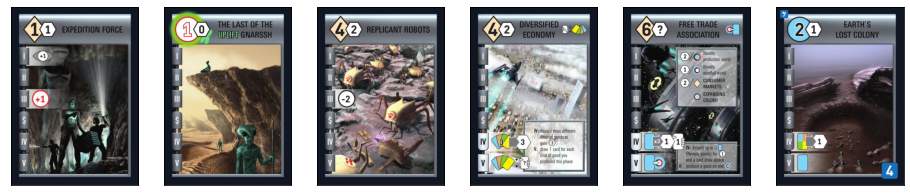

Initialized


In [2]:
library = Library()
library.setup()
print('Designs: {}'.format(len(library.designs)))

display = Display('card_images', figsize=(16,4))
card_display = CardDisplay(library, display)

deck = Deck(library)
deck.build_deck(0)
print('Cards: {}'.format(len(deck.cards)))

samples = random.sample(deck.cards, 6)
fig, ax = card_display.plot_cards(samples, 6)
card_display.show()
print('Initialized')

(<Figure size 1152x288 with 7 Axes>,
 array([<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>], dtype=object))

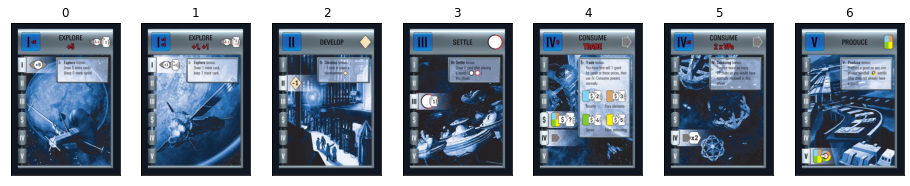

In [3]:
card_display.plot_actions(show_index=True)

In [4]:
resource = GameResource(library=library, display=card_display)
player1 = Player(name="Blue", ai=False)
player2 = Player(name="Red", ai=False)
players = [player1, player2]
game = Game(resource=resource, session_id='testing', expanded=0, players=players, start_seed=28339)

print(game)

Game:{'resource': <rftg.game.GameResource object at 0x7f88805f4710>, 'session_id': 'testing', 'simulation': False, 'debug': False, 'random_seed': 0, 'start_seed': 28339, 'players': [<Player Blue/False>, <Player Red/False>], 'expanded': 0, 'promo': False, 'vp_pool': 0, 'action_selected': [], 'cur_action': <Phase.ACTION: 0>, 'turn': 0, 'round': 0, 'game_over': False, 'deck': <rftg.cards.Deck object at 0x7f88805f4860>}


## Game Engine


[<Card 6/Old Earth/Location.HAND/-1>, <Card 7/Epsilon Eridani/Location.HAND/-1>, <Card 8/Alpha Centauri/Location.HAND/-1>, <Card 9/New Sparta/Location.HAND/-1>, <Card 10/Earth's Lost Colony/Location.HAND/-1>]
109


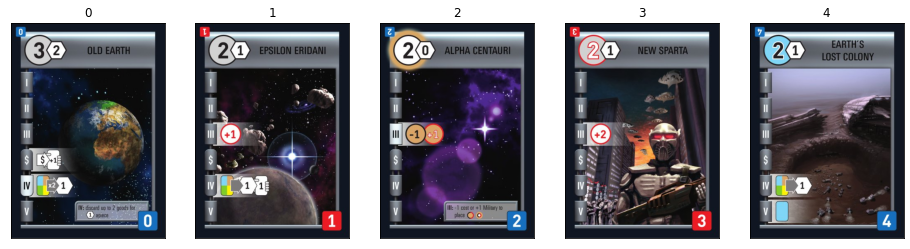

In [5]:
start_cards = game.deck.get_cards_with_flags(CardFlag.START)
game.deck.pick_cards(start_cards)
print(start_cards)
print(game.deck.remain_cards())

game.resource.display.plot_cards(start_cards, len(start_cards), show_index=True)
game.resource.display.save('RFTG_Game_Deck_Start_World.png')
game.resource.display.show()

[<Card 66/Pirate World/Location.HAND/0>, <Card 24/Contact Specialist/Location.HAND/0>, <Card 85/Aquatic Uplift Race/Location.HAND/0>, <Card 54/Pre-Sentient Race/Location.HAND/0>, <Card 34/Rebel Warrior Race/Location.HAND/0>, <Card 47/Free Trade Association/Location.HAND/0>]
103


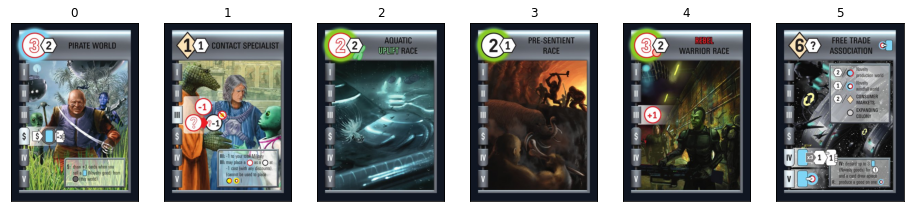

In [6]:
game.shuffle_deck()
cards = game.deck.draw_cards(6)
game.deck.set_cards_player(cards, player_index=0)
print(cards)
print(game.deck.remain_cards())

game.resource.display.plot_cards(cards, len(cards), show_index=True)
game.resource.display.save('RFTG_Game_Deck_Draw_6_Cards.png')
game.resource.display.show()

In [7]:
print(game.deck.get_cards_by_player(game.deck.cards, player_index=0))

[<Card 24/Contact Specialist/Location.HAND/0>, <Card 34/Rebel Warrior Race/Location.HAND/0>, <Card 47/Free Trade Association/Location.HAND/0>, <Card 54/Pre-Sentient Race/Location.HAND/0>, <Card 66/Pirate World/Location.HAND/0>, <Card 85/Aquatic Uplift Race/Location.HAND/0>]


In [8]:
from rftg.decision import *
from rftg.enums import *

decision = UIDecision(game)

UIDecision make_choice
{'cards': [<Card 6/Old Earth/Location.HAND/-1>, <Card 7/Epsilon Eridani/Location.HAND/-1>, <Card 8/Alpha Centauri/Location.HAND/-1>, <Card 9/New Sparta/Location.HAND/-1>, <Card 10/Earth's Lost Colony/Location.HAND/-1>]}


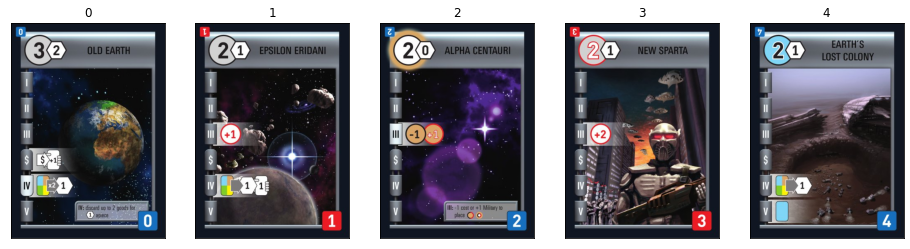

In [9]:
decision.make_choice(0, Choice.START, cards=start_cards)

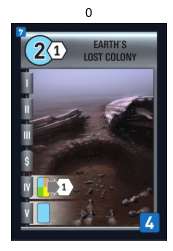

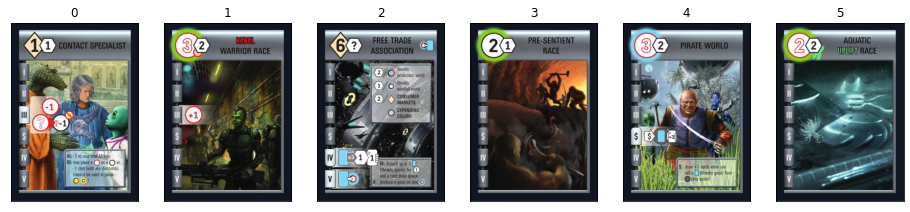

In [10]:
game.plot_player_cards(0, Location.ACTIVE)
game.plot_player_cards(0, Location.HAND)

UIDecision make_choice
{}


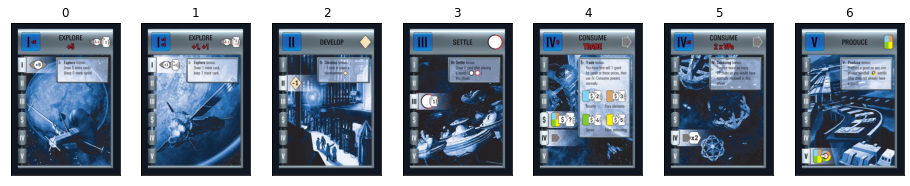

In [11]:
decision.make_choice(0, Choice.ACTION)

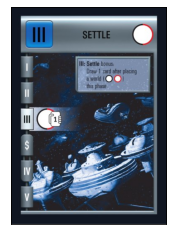

In [12]:
game.plot_player_actions(0)

UIDecision make_choice


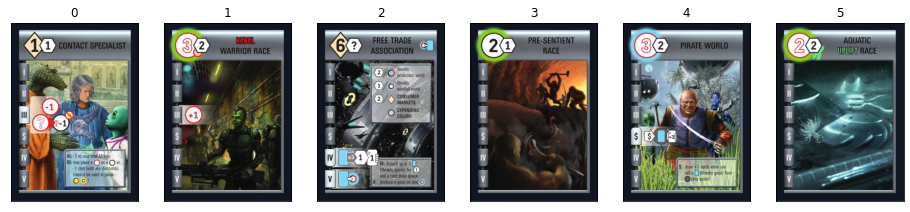

In [13]:
cards = game.get_player_cards(0, location=Location.HAND)
decision.make_choice(0, Choice.DISCARD, cards=cards, discard=2)

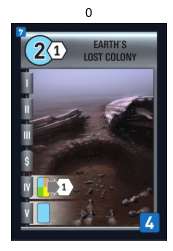

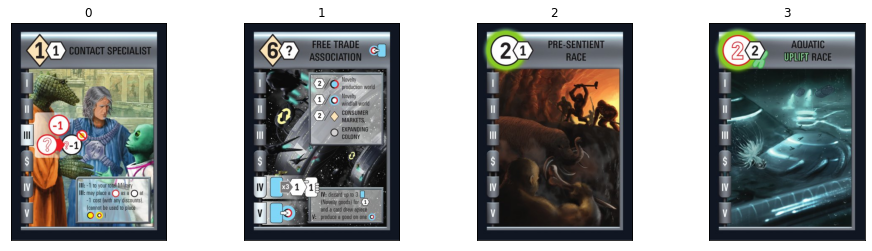

In [14]:
game.plot_player_cards(0, Location.ACTIVE)
game.plot_player_cards(0, Location.HAND)

UIDecision make_choice
{'cards': [<Card 24/Contact Specialist/Location.HAND/0>, <Card 47/Free Trade Association/Location.HAND/0>, <Card 54/Pre-Sentient Race/Location.HAND/0>, <Card 85/Aquatic Uplift Race/Location.HAND/0>], 'phase': <Phase.DEVELOP: 2>}


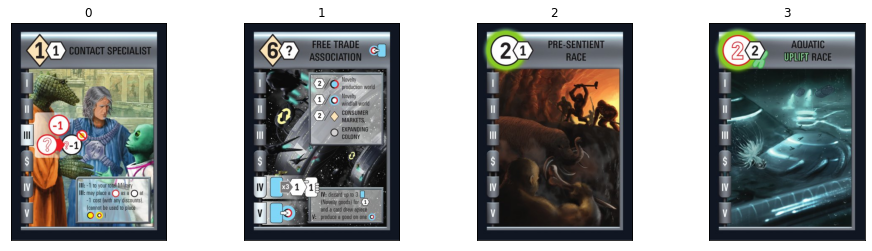

[<Card 24/Contact Specialist/Location.HAND/0>]


In [15]:
cards = game.get_player_cards(0, location=Location.HAND)
chosen_cards = decision.make_choice(0, Choice.PLACE, cards=cards, phase=Phase.DEVELOP)
print(chosen_cards)